In [59]:
##read this in conjuction w/ the read_me_steps.txt file which outlines a few of the steps our group intends to take

import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

In [60]:
##STEP 1 READ DATA IN & CHANGE COLUMN NAMES TO REAL NAMES
data_dict = {
    'P(IPO)':'offer_price',
    'P(H)': 'price_range_higher_bound',
    'P(L)': 'price_range_lower_bound',
    'P(1Day)':'first_day_trading_price',
    'C1':'days',
    'C2':'top_tier_dummy',
    'C3':'earnings_per_share',
    'C4':'prior_nasdaq_15day_returns',
    'C5':'outstanding_shares',
    'C6':'offering_shares',
    'C7':'sales',
    'T1':'number_of_sentences',
    'T2':'number_of_words',
    'T3':'number_of_real_words',
    'T4':'number_of_long_sentences',
    'T5':'number_of_long_words',
    'S1':'number_of_positive_words',
    'S2':'number_of_negative_words',
    'S3':'number_of_uncertain_words',
    'Y1':'pre_ipo_price_revision',
    'Y2':'post_ipo_initial_return',
    'C3':'positive_eps_dummy',
    'C5':'share_overhang',
    'C6':'up_revision',
    'I1':'ticker',
    'I2':'company_name',
    'I3':'industry_classifier'
    
}

df = pd.read_excel('Competition1_raw_data.xlsx')
df.rename(columns=data_dict,inplace=True)

#sketchy column values and not super valuable w/ 200+ categories anyway
df = df.drop('industry_classifier',1)
df.head()

,ticker,company_name,offer_price,price_range_higher_bound,price_range_lower_bound,first_day_trading_price,days,top_tier_dummy,positive_eps_dummy,prior_nasdaq_15day_returns,share_overhang,up_revision,sales,number_of_sentences,number_of_words,number_of_real_words,number_of_long_sentences,number_of_long_words,number_of_positive_words,number_of_negative_words,number_of_uncertain_words
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,10,9.5,8.5,11.87,122,1,3.43,0.0290743,40962052,10600000,51.345,470,12719,11560,301,690,62,117,139
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,8,10,8,7.25,259,0,-1.62,-0.0133516,28869196,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,ACAD,ACADIA PHARMACEUTICALS INC,7,14,12,6.7,90,1,-1.24,0.020715,16845668,5000000,7.378,201,5262,4785,128,325,61,33,60
3,ACHN,ACHILLION PHARMACEUTICALS INC,11.5,16,14,12.39,209,1,-0.91,0.0200231,14848637,4500000,8.526,328,8259,7574,177,509,80,59,110
4,ACLI,AMERICAN COMMERCIAL LINES INC.,21,21,19,56.6,80,1,0.07,-0.0348947,30741716,8250000,632.298,572,14830,13176,336,720,67,149,167


In [61]:
#JUST MAKING SURE THIS WORKS THE WAY I THINK IT WORKS
print(df.replace('-',np.nan).isna().sum().sales == len(df[df['sales']=='-']))

#PRINT NUMBER OF MISSING VALUES IN EACH COLUMN
df.replace('-',np.nan).isna().sum()

True


ticker                         0
company_name                   0
offer_price                    5
price_range_higher_bound      10
price_range_lower_bound       10
first_day_trading_price       22
days                          22
top_tier_dummy                22
positive_eps_dummy            36
prior_nasdaq_15day_returns    22
share_overhang                 6
up_revision                    6
sales                         72
number_of_sentences            1
number_of_words                1
number_of_real_words           1
number_of_long_sentences       1
number_of_long_words           1
number_of_positive_words       1
number_of_negative_words       1
number_of_uncertain_words      1
dtype: int64

In [62]:
#STEP 2, IMPUTE MISSING DATA
placeholder = df.replace('-',np.nan).isna().sum().reset_index().rename(columns={'index':'columns1',0:'nulls'})
needs_replacement = placeholder[placeholder['nulls']>0].columns1.unique()

median_value_dict = {}

for i in needs_replacement:
    new_df = df[df['{}'.format(i)]!='-']
    med = new_df['{}'.format(i)].median()
    median_value_dict.update({i:med})
    
median_value_dict

for i in needs_replacement:
    df['{}'.format(i)] = df['{}'.format(i)].replace('-',median_value_dict['{}'.format(i)])

df.replace('-',np.nan).isna().sum()

ticker                        0
company_name                  0
offer_price                   0
price_range_higher_bound      0
price_range_lower_bound       0
first_day_trading_price       0
days                          0
top_tier_dummy                0
positive_eps_dummy            0
prior_nasdaq_15day_returns    0
share_overhang                0
up_revision                   0
sales                         0
number_of_sentences           0
number_of_words               0
number_of_real_words          0
number_of_long_sentences      0
number_of_long_words          0
number_of_positive_words      0
number_of_negative_words      0
number_of_uncertain_words     0
dtype: int64

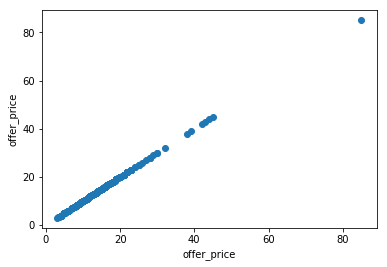

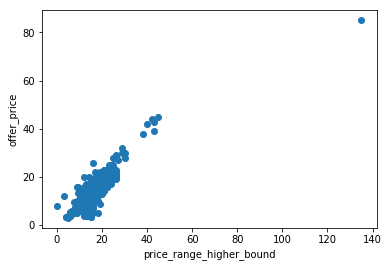

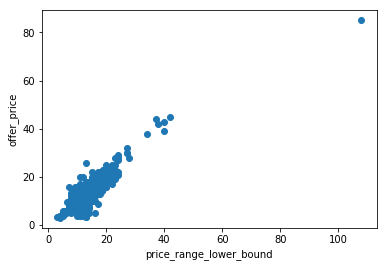

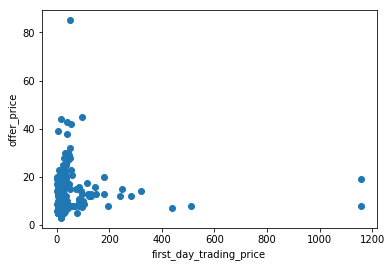

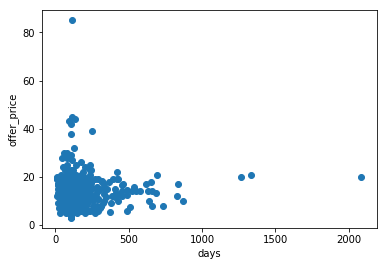

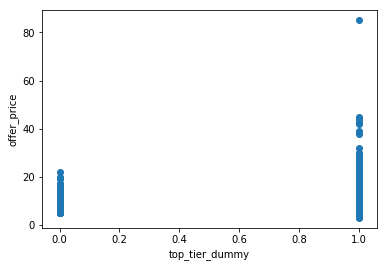

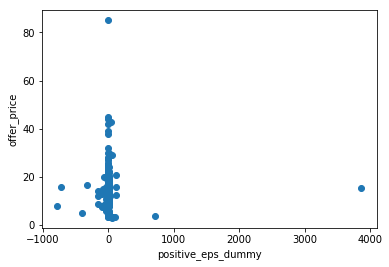

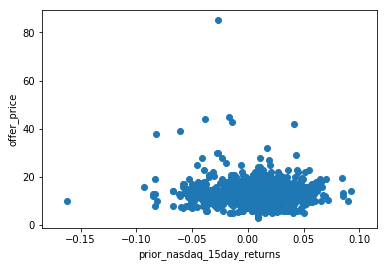

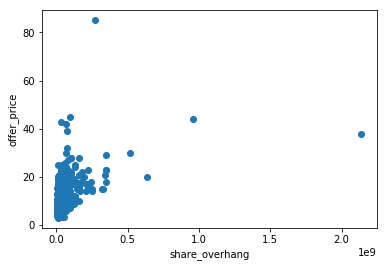

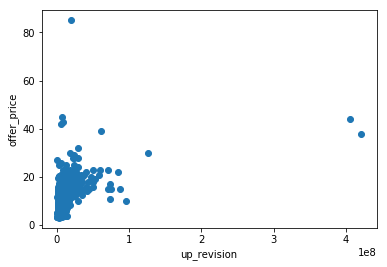

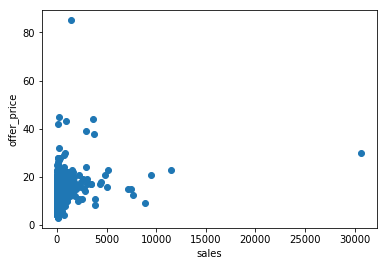

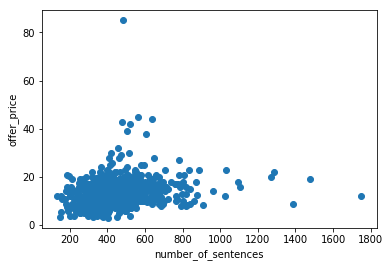

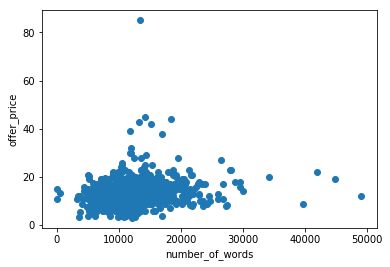

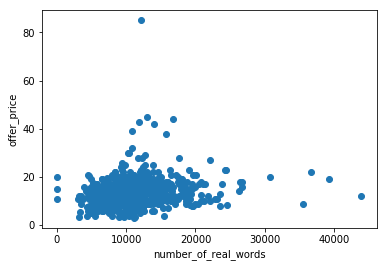

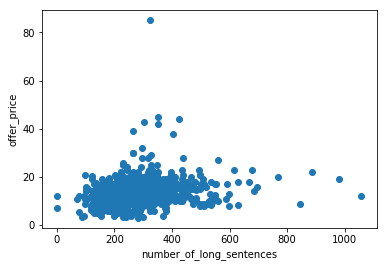

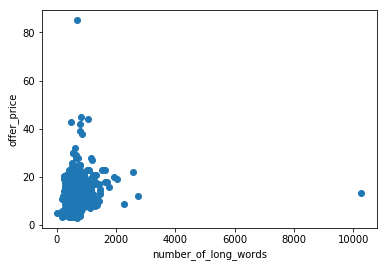

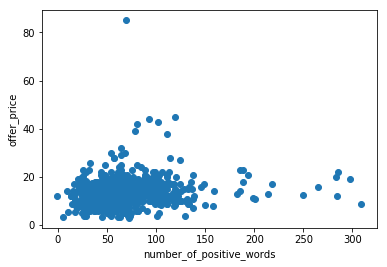

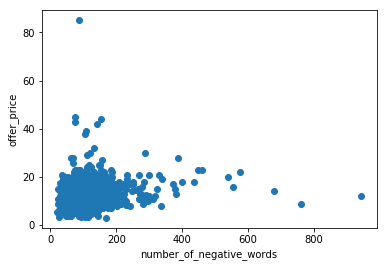

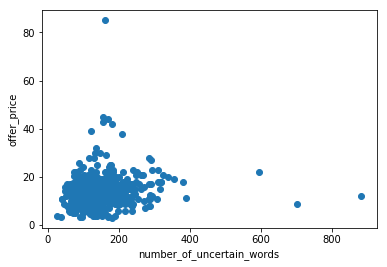

In [63]:
#STEP 3 EDA - CHECK OUT SCATTER PLOTS
import matplotlib.pyplot as plt

continous_columns = df.drop(['ticker','company_name'],1).columns

for i in continous_columns:
    plt.scatter(df['{}'.format(i)],df['offer_price'])
    plt.xlabel('{}'.format(i))
    plt.ylabel('offer_price')
    plt.show()
    

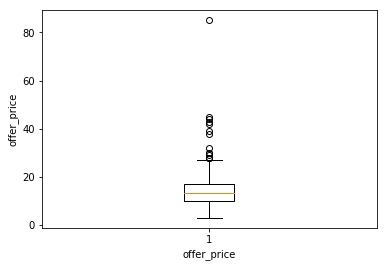

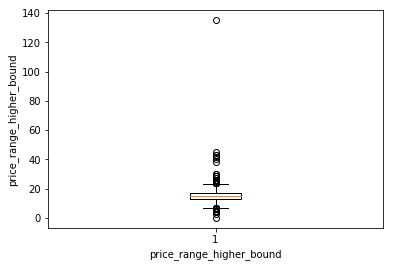

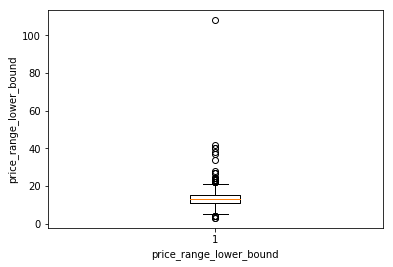

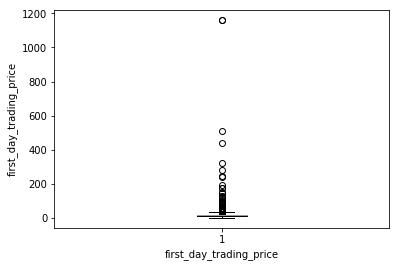

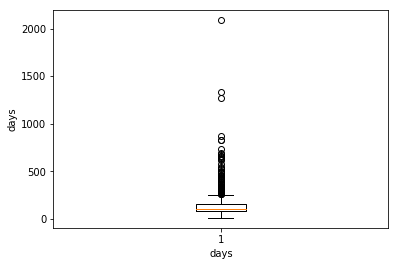

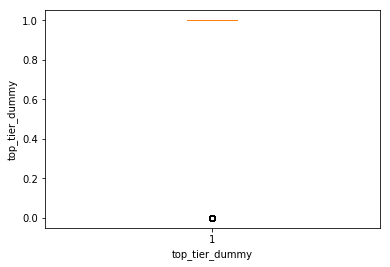

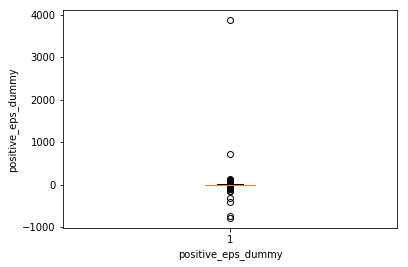

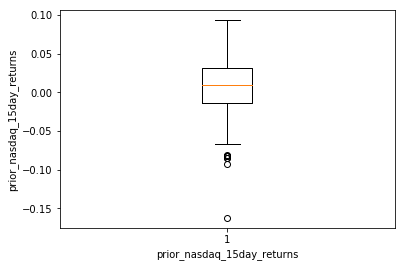

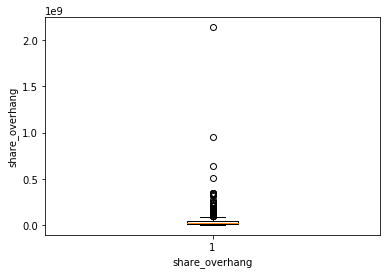

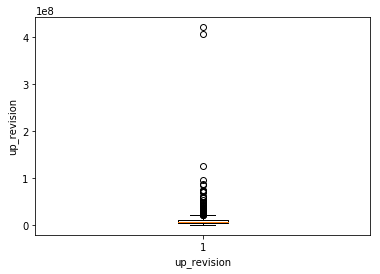

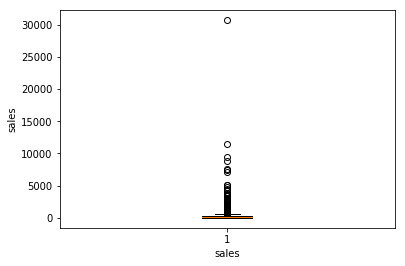

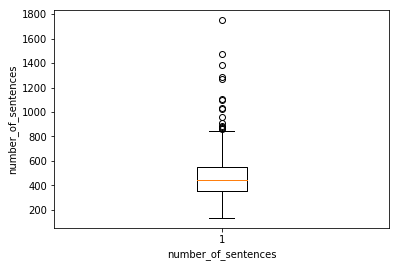

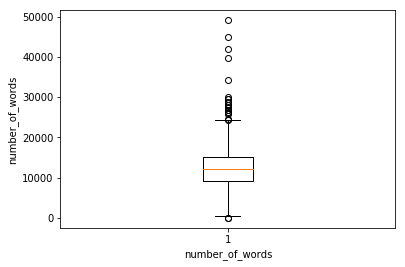

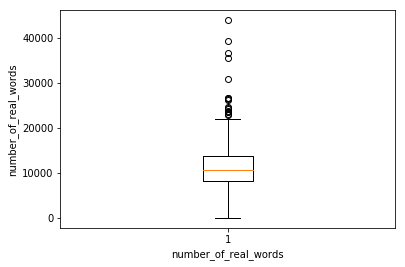

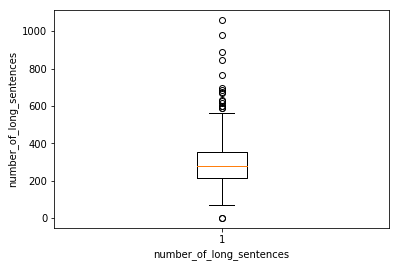

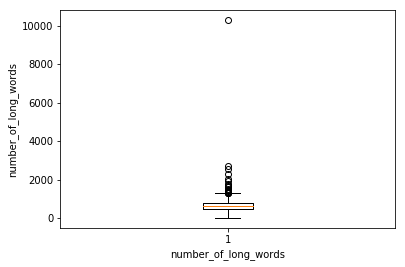

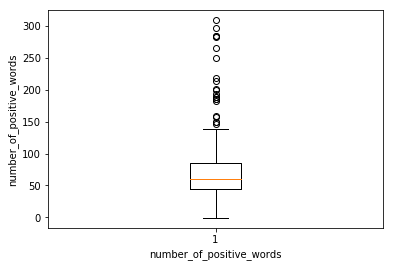

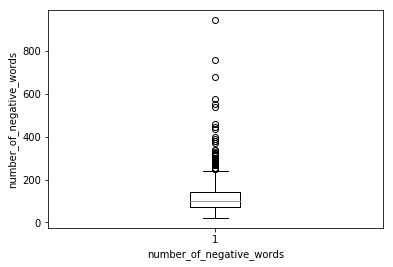

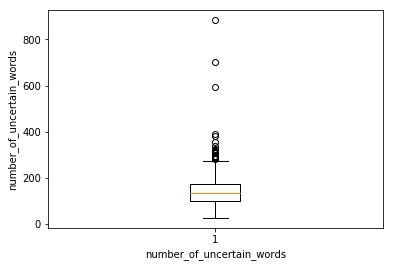

In [53]:
#STEP 3 EDA - CHECK OUT BOX PLOTS

#WHY ARE THESE DISTRIBUTIONS SO WEIRD. TOO MANY OUTLIERS FOR ME TO THINK THEY ARE REAL? INVESTIGATE FURTHER. 
#MAYBE THIS WILL BE BETTER W/ STANDARDIZATION/NORMALIZATION? IDEALLY DON'T WANT TO THROW OUT THAT MANY VALUES
for i in continous_columns:
    plt.boxplot(df['{}'.format(i)])
    plt.ylabel('{}'.format(i))
    plt.xlabel('{}'.format(i))
    plt.show()

In [54]:
#STEP 3 EDA - CORRELATIONS. WHICH OF THESE VARIABLES CAN WE REMOVE?
df.corr()

,offer_price,price_range_higher_bound,price_range_lower_bound,first_day_trading_price,days,top_tier_dummy,positive_eps_dummy,prior_nasdaq_15day_returns,share_overhang,up_revision,sales,number_of_sentences,number_of_words,number_of_real_words,number_of_long_sentences,number_of_long_words,number_of_positive_words,number_of_negative_words,number_of_uncertain_words
offer_price,1.000000,0.867953,0.888556,0.038929,0.016603,0.218751,0.015709,-0.049557,0.376640,0.364109,0.230273,0.208112,0.184003,0.177181,0.195986,0.102525,0.140524,0.120684,0.134788
price_range_higher_bound,0.867953,1.000000,0.990618,0.038671,-0.013412,0.188453,0.001585,-0.091464,0.337514,0.317631,0.218296,0.185541,0.173645,0.172308,0.184652,0.101051,0.161129,0.135951,0.126870
price_range_lower_bound,0.888556,0.990618,1.000000,0.042100,-0.007560,0.205707,0.002475,-0.094337,0.348534,0.334299,0.232358,0.201929,0.188881,0.187159,0.200263,0.110603,0.177223,0.154112,0.142340
first_day_trading_price,0.038929,0.038671,0.042100,1.000000,-0.023288,0.034825,-0.131636,-0.056249,-0.007910,-0.010152,-0.016819,-0.076577,-0.070652,-0.071958,-0.076439,-0.049227,-0.057878,-0.040453,-0.038385
days,0.016603,-0.013412,-0.007560,-0.023288,1.000000,-0.017937,0.001916,0.034674,0.007371,0.008988,0.030425,0.144137,0.135707,0.133499,0.126836,0.074227,0.113806,0.129525,0.132603
top_tier_dummy,0.218751,0.188453,0.205707,0.034825,-0.017937,1.000000,0.007315,-0.050363,0.128547,0.123738,0.094346,0.173089,0.169630,0.169544,0.180188,0.136145,0.166686,0.134522,0.176102
positive_eps_dummy,0.015709,0.001585,0.002475,-0.131636,0.001916,0.007315,1.000000,0.002999,-0.000830,0.010819,0.006326,0.004855,-0.004151,-0.004067,-0.003890,-0.008929,0.019333,0.011250,-0.008848
prior_nasdaq_15day_returns,-0.049557,-0.091464,-0.094337,-0.056249,0.034674,-0.050363,0.002999,1.000000,-0.089836,-0.103205,-0.004159,-0.017913,-0.016089,-0.002579,-0.007253,0.006841,-0.010819,-0.000876,0.010677
share_overhang,0.376640,0.337514,0.348534,-0.007910,0.007371,0.128547,-0.000830,-0.089836,1.000000,0.881027,0.407184,0.225417,0.230539,0.234649,0.240343,0.139435,0.216999,0.195084,0.203033
up_revision,0.364109,0.317631,0.334299,-0.010152,0.008988,0.123738,0.010819,-0.103205,0.881027,1.000000,0.395500,0.208094,0.205957,0.213492,0.222110,0.125427,0.190445,0.190605,0.166972


In [7]:
#STEP 4 STANDARDIZE/NORMALIZE
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

###STANDARDIZATION EXAMPLE 1. USE THIS FOR ALL THE COLUMNS DOWN THE ROAD
fake = df 
#fake.replace({'-',0 or median})
fake.first_day_trading_price.sort_values()

pd.Series(min_max_scaler.fit_transform(np.array(fake['first_day_trading_price']).reshape(-1,1)).reshape(1,682)[0]).hist()
import matplotlib.pyplot as plt 
plt.show()

In [51]:
###HOW TO NORMALIZE DATAPOINTS W/O GENERATING RANDOM NEW DATA
###ALSO WHY WOULD WE EVEN WANT TO LOSE THE DISTRIBUTION OF THE DATAPOINTS...
###NOT CONVINCED NORMALIZING MAKES SENSE HERE...DISCUSS W/ JTAO